In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
data=pd.read_csv('ex1data1.txt',header=None)

In [178]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [179]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Plotting of the data to visualize the relationship between the dependent(y) and the independent(X) variable

Text(0.5, 1.0, 'Population vs Profit')

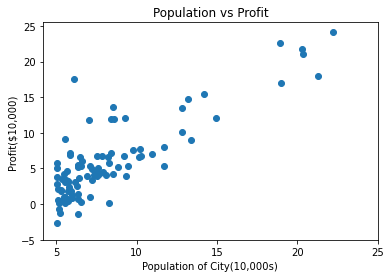

In [180]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population of City(10,000s)')
plt.ylabel('Profit($10,000)')
plt.title('Population vs Profit')

In [181]:
#cost function
def computecost(X,y,theta):
    m=len(y)
    prediction=X.dot(theta)
    square_err=(prediction-y)**2
    return (1/(2*m)*np.sum(square_err))

In [182]:
#initializing X,y,theta
data_n=data.values
m=len(data_n[:,-1])
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,-1].reshape(m,1)
theta=np.zeros((2,1))

In [183]:
#compute cost 
computecost(X,y,theta)

32.072733877455676

In [184]:
#gradient descent to optimize Θ, by minimizing the cost function J(Θ)
def gradient_descent(X,y,theta,alpha,num_iter):
    """
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    m=len(y)
    J_history=[]
    
    for i in range(num_iter):
        prediction=X.dot(theta)
        error=np.dot(X.transpose(),(prediction-y))
        descent=alpha*1/m*error
        theta-=descent
        J_history.append(computecost(X,y,theta))
    return theta,J_history

In [185]:
def model_plot():
    plt.scatter(data[0],data[1])
    x_value=[x for x in range(25)]
    y_value=[y*theta[1]+theta[0] for y in x_value]
    plt.plot(x_value,y_value,color="r")
    plt.xticks(np.arange(5,30,step=5))
    plt.yticks(np.arange(-5,30,step=5))
    plt.xlabel("Population of City (10,000s)")
    plt.ylabel("Profit ($10,000")
    plt.title("Profit vs Population")

In [186]:
def plot_fun():
   
    plt.plot(J_history)
    plt.xlabel('Iterations')
    plt.ylabel('$J(\Theta)$')
    plt.title('cost function using gradient descent')
    

In [187]:
theta,J_history=gradient_descent(X,y,theta,0.001,1500)

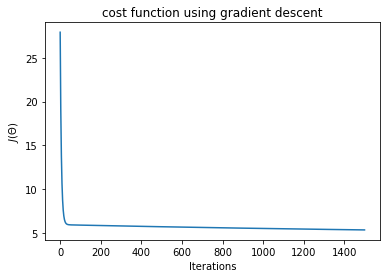

In [188]:
plot_fun()

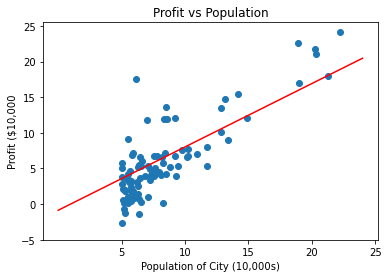

In [189]:
model_plot()

In [190]:
def show_hypo():
    print(f'our hypothesis(linear regression model) is/n h(x)= {round(theta[0,0],2)} + {round(theta[1,0],2)} x1 )')

In [191]:
show_hypo()

our hypothesis(linear regression model) is/n h(x)= -0.86 + 0.89 x1 )


In [192]:
theta,J_history=gradient_descent(X,y,theta,0.01,1500)

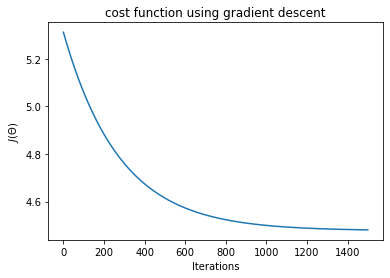

In [193]:
plot_fun()

In [194]:
show_hypo()

our hypothesis(linear regression model) is/n h(x)= -3.69 + 1.17 x1 )


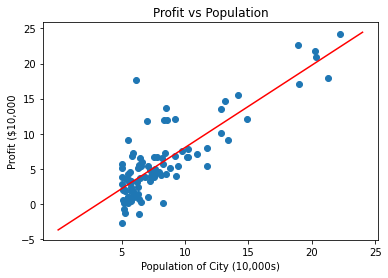

In [195]:
model_plot()

In [196]:
def predict(x):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    x=np.array([1,x])
    predictions= np.dot(theta.transpose(),x)
    
    
    predict1=predictions[0]*10000
    print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))


In [197]:
predict(3.5)

For population = 35,000, we predict a profit of $4112.0


In [198]:
predict(4.5)

For population = 35,000, we predict a profit of $15839.0


In [199]:
predict(6.1101)

For population = 35,000, we predict a profit of $34720.0
